El radio y angulo para el tiempo 2025-04-01 00:00:00 es: 
(<Quantity 9667.78605556 km>, <Quantity 190.62080864 deg>)


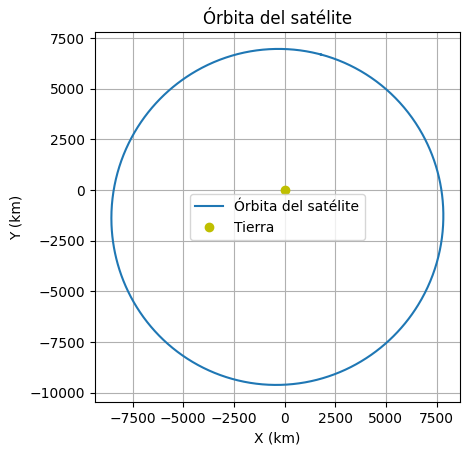

El tiempo asociado al radio ingresado es:
2025-03-31 00:53:04.550


(None, None)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.time import Time, TimeDelta

#Declaracion de las constantes a utilizar
GMe=398600.4405 
R_earth=6371.0  
a=1.30262*R_earth
e=0.16561
omega=15*u.deg
tp=Time('2025-03-31 00:00:00')

#Funcion para resolver la ecuacion de kepler
def Solucion_E(L): 
    E=L
    for i in range(100):
        f=E-e*np.sin(E) - L
        df=1-e*np.cos(E)
        delta=-f/df
        E+=delta
        if abs(delta) < 1e-100:
            break
    return E

#Funcion para hallar la anomalía verdadera
def Solucion_f(E):
    f = 2 *np.arctan(np.sqrt((1+e)/(1-e))*np.tan(E/2))
    return f

#Funcion para hallar la posicion tomando como dato un tiempo en UTC y retorna un radio y un angulo Phi
def position(t):
    Tiempo=Time(t, format='iso', scale='utc')
    l=np.sqrt(GMe/a**3)*(Tiempo-tp).sec
    E=Solucion_E(l)
    f=Solucion_f(E)*u.rad
    r=a*(1-e**2)/(1+e*np.cos(f))
    phi=omega.to(u.rad) + f
    return r*u.km, phi.to(u.deg)

print("El radio y angulo para el tiempo 2025-04-01 00:00:00 es: "), print(position("2025-04-01 00:00:00"))

#Funcion que retorna la orbita para un unico periodo
def orbit ():
    T=np.linspace(0,2*np.pi, 1000)*u.rad
    r=a*(1-e**2)/(1+e*np.cos(T))
    X=r*np.sin(T+omega)
    Y=r*np.cos(T+omega)
    plt.plot(X.to_value(), Y.to_value(), label="Órbita del satélite")
    plt.plot(0, 0, 'yo', label="Tierra")
    plt.xlabel("X (km)")
    plt.ylabel("Y (km)")
    plt.gca().set_aspect('equal')
    plt.title("Órbita del satélite")
    plt.grid(True)
    plt.legend(fontsize='10')
    plt.show()

orbit()

#Funcion que 
def date(r0):
    T=np.linspace(0,2*np.pi,1000)
    r=a*(1-e**2)/(1+e*np.cos(T))

    for i in range(len(T)-1):
        if (r[i] - r0)*(r[i+1] - r0) < 0:
            t=T[i]+((T[i+1]-T[i])*(r0-r[i])/(r[i+1]-r[i]))
            E=2*np.arctan(np.sqrt((1-e)/(1+e))*np.tan(t/2))
            l=E-(e*np.sin(E))
            factor=(l*np.sqrt(a**3/GMe))
            Tie=TimeDelta(factor*u.s)+tp
                
            return Tie
    if not False:
        print("El radio ingresado no hace parte de la trayectoria barrida por el satélite")
        return None

print("El tiempo asociado al radio ingresado es:"), print(date(1.5*R_earth))
